## ETA-PREDICTION-FOR-DELIVERY-COMPANY

### Business Understanding

Ride-hailing apps like Uber and Yassir depend heavily on real-time data and sophisticated machine learning algorithms to streamline and enhance their services. Accurate ETA predictions are crucial for several reasons:

- Customer Satisfaction:
Accurate ETA estimates provide customers with reliable information about when their ride will arrive. This improves their overall experience and satisfaction.
Reliable ETAs build trust with customers, leading to higher retention rates and positive reviews.

- Operational Efficiency:
By predicting ETAs more accurately, Yassir can optimize the distribution of drivers and resources. This ensures that drivers are effectively assigned to rides based on demand and proximity, reducing idle time and improving operational efficiency.
Improved ETA predictions can help reduce operational costs by minimizing wait times and inefficient routes. This leads to better fuel usage and lower overall costs.

- Competitive Advantage:
In a competitive market, offering more accurate ETAs can differentiate Yassir from its competitors. This can attract more users and partners who value reliability and efficiency.
Accurate ETAs can enhance relationships with business partners by providing them with reliable scheduling information and improving the overall service experience.

- Impact on Business Strategy:
Savings from improved efficiency can be reinvested into other areas of the business, such as technology upgrades, marketing, or expansion efforts.
Leveraging real-time data and advanced analytics can drive strategic decisions and foster innovation within the company.

#### Objectives
The goal of this project is to develop a machine learning model that predicts the estimated time of arrival (ETA) at the dropoff point for a single Yassir journey. This model will:

- Enhance Accuracy

- Improve Efficiency

- Drive Innovation




In [153]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import ( 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, 
    GradientBoostingRegressor
)

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error, 
    root_mean_squared_error, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn import metrics
import joblib

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


In [154]:
# Create a dataframe
train_df = pd.read_csv('../Dataset/Train.csv')
test_df = pd.read_csv('../Dataset/Test.csv')
weather_df = pd.read_csv('../Dataset/Weather.csv')
sample_df = pd.read_csv('../Dataset/SampleSubmission.csv')

### EDA

In [155]:
train_df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


In [156]:
test_df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance
0,000V4BQX,2019-12-21T05:52:37Z,2.981,36.688,2.978,36.754,17549
1,003WBC5J,2019-12-25T21:38:53Z,3.032,36.769,3.074,36.751,7532
2,004O4X3A,2019-12-29T21:30:29Z,3.035,36.711,3.010,36.758,10194
3,006CEI5B,2019-12-31T22:51:57Z,2.902,36.738,3.208,36.698,32768
4,009G0M2T,2019-12-28T21:47:22Z,2.860,36.692,2.828,36.696,4513


In [157]:
weather_df.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [158]:
weather_df.shape

(61, 10)

In [159]:
sample_df.head()

,ID,ETA
0,000V4BQX,0
1,003WBC5J,0
2,004O4X3A,0
3,006CEI5B,0
4,009G0M2T,0


checking for data types

In [160]:
train_df.shape

(83924, 8)

In [161]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [162]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])

Checking statistical info

In [163]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,83924,83924,ZZZY11ZN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp,83924,NaN,NaN,NaN,2019-12-04 14:22:20.568883712+00:00,2019-11-19 23:00:08+00:00,2019-11-27 01:53:00.500000+00:00,2019-12-04 01:46:50.500000+00:00,2019-12-11 21:36:44+00:00,2019-12-19 23:59:29+00:00,NaN
Origin_lat,83924.0,NaN,NaN,NaN,3.052406,2.807,2.994,3.046,3.095,3.381,0.096388
Origin_lon,83924.0,NaN,NaN,NaN,36.739358,36.589,36.721,36.742,36.76,36.82,0.032074
Destination_lat,83924.0,NaN,NaN,NaN,3.056962,2.807,2.995,3.049,3.109,3.381,0.10071
Destination_lon,83924.0,NaN,NaN,NaN,36.737732,36.596,36.718,36.742,36.76,36.819,0.032781
Trip_distance,83924.0,NaN,NaN,NaN,13527.82141,1.0,6108.0,11731.5,19369.0,62028.0,9296.716006
ETA,83924.0,NaN,NaN,NaN,1111.697762,1.0,701.0,1054.0,1456.0,5238.0,563.565486


checking for null values

In [164]:
train_df.isna().sum()

ID                 0
Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
dtype: int64

checking for duplicates

In [165]:
train_df.duplicated().sum()

np.int64(0)

In [166]:
train_df_noid = train_df.drop(columns=['ID'])
train_df_noid.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784
1,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576
2,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526
3,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130
4,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138


In [167]:
train_df_noid['Year'] = train_df_noid['Timestamp'].dt.year

train_df_noid['Day'] = train_df_noid['Timestamp'].dt.day
train_df_noid['Month_name'] = train_df_noid['Timestamp'].dt.strftime('%B')
train_df_noid['Day_name'] = train_df_noid['Timestamp'].dt.strftime('%A')
train_df_noid['Hour'] = train_df_noid['Timestamp'].dt.month
train_df_noid['Minute'] = train_df_noid['Timestamp'].dt.day


In [168]:
train_df_noid.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Year,Day,Month_name,Day_name,Hour,Minute
0,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784,2019,4,December,Wednesday,12,4
1,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576,2019,10,December,Tuesday,12,10
2,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526,2019,23,November,Saturday,11,23
3,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130,2019,1,December,Sunday,12,1
4,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138,2019,17,December,Tuesday,12,17


In [169]:
train_df_noid.isna().sum()

Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
Year               0
Day                0
Month_name         0
Day_name           0
Hour               0
Minute             0
dtype: int64

In [170]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        61 non-null     object 
 1   dewpoint_2m_temperature     61 non-null     float64
 2   maximum_2m_air_temperature  61 non-null     float64
 3   mean_2m_air_temperature     61 non-null     float64
 4   mean_sea_level_pressure     61 non-null     float64
 5   minimum_2m_air_temperature  61 non-null     float64
 6   surface_pressure            61 non-null     float64
 7   total_precipitation         61 non-null     float64
 8   u_component_of_wind_10m     61 non-null     float64
 9   v_component_of_wind_10m     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB


In [171]:
weather_df =weather_df.rename(columns={'date':'Timestamp'})

weather_df['Timestamp'] = pd.to_datetime(weather_df['Timestamp'])

#train_df_noid['Timestamp'] = train_df_noid['Timestamp'].dt.tz_convert(None)

In [172]:
weather_df['Year'] = weather_df['Timestamp'].dt.year
weather_df['Day'] = weather_df['Timestamp'].dt.day
weather_df['Month_name'] = weather_df['Timestamp'].dt.strftime('%B')

train_drop_time = train_df_noid.drop(columns=['Timestamp'])
weath_drop_time = weather_df.drop(columns=['Timestamp'])

In [173]:
train_weath_df = pd.merge(train_drop_time, weath_drop_time, how= 'outer', on = ['Year', 'Month_name', 'Day'])

In [174]:
train_weath_df.head(20)

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Year,Day,Month_name,Day_name,...,Minute,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,3.239,36.784,3.054,36.763,23350.0,3130.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
1,2.995,36.738,3.207,36.698,25342.0,1341.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
2,3.197,36.715,3.174,36.726,4846.0,643.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
3,3.035,36.729,3.012,36.761,4930.0,526.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
4,3.036,36.740,3.047,36.761,4571.0,617.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
5,2.974,36.695,3.032,36.769,19031.0,1287.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
6,2.966,36.758,2.991,36.754,2940.0,487.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
7,3.040,36.774,3.051,36.778,1506.0,335.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
8,3.035,36.739,3.056,36.770,6030.0,917.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132
9,3.010,36.759,3.059,36.755,7938.0,966.0,2019,1,December,Sunday,...,1.0,284.528839,292.345764,288.691711,101382.914062,285.94043,100338.460938,1.860000e-09,-0.076007,1.090132


In [175]:
train_weath_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83954 entries, 0 to 83953
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Origin_lat                  83924 non-null  float64
 1   Origin_lon                  83924 non-null  float64
 2   Destination_lat             83924 non-null  float64
 3   Destination_lon             83924 non-null  float64
 4   Trip_distance               83924 non-null  float64
 5   ETA                         83924 non-null  float64
 6   Year                        83954 non-null  int32  
 7   Day                         83954 non-null  int32  
 8   Month_name                  83954 non-null  object 
 9   Day_name                    83924 non-null  object 
 10  Hour                        83924 non-null  float64
 11  Minute                      83924 non-null  float64
 12  dewpoint_2m_temperature     83954 non-null  float64
 13  maximum_2m_air_temperature  839

In [176]:
train_weath_df.isna().sum()

Origin_lat                    30
Origin_lon                    30
Destination_lat               30
Destination_lon               30
Trip_distance                 30
ETA                           30
Year                           0
Day                            0
Month_name                     0
Day_name                      30
Hour                          30
Minute                        30
dewpoint_2m_temperature        0
maximum_2m_air_temperature     0
mean_2m_air_temperature        0
mean_sea_level_pressure        0
minimum_2m_air_temperature     0
surface_pressure               0
total_precipitation            0
u_component_of_wind_10m        0
v_component_of_wind_10m        0
dtype: int64

In [177]:
train_weath_df = train_weath_df.dropna()

#### **Univariat Analysis

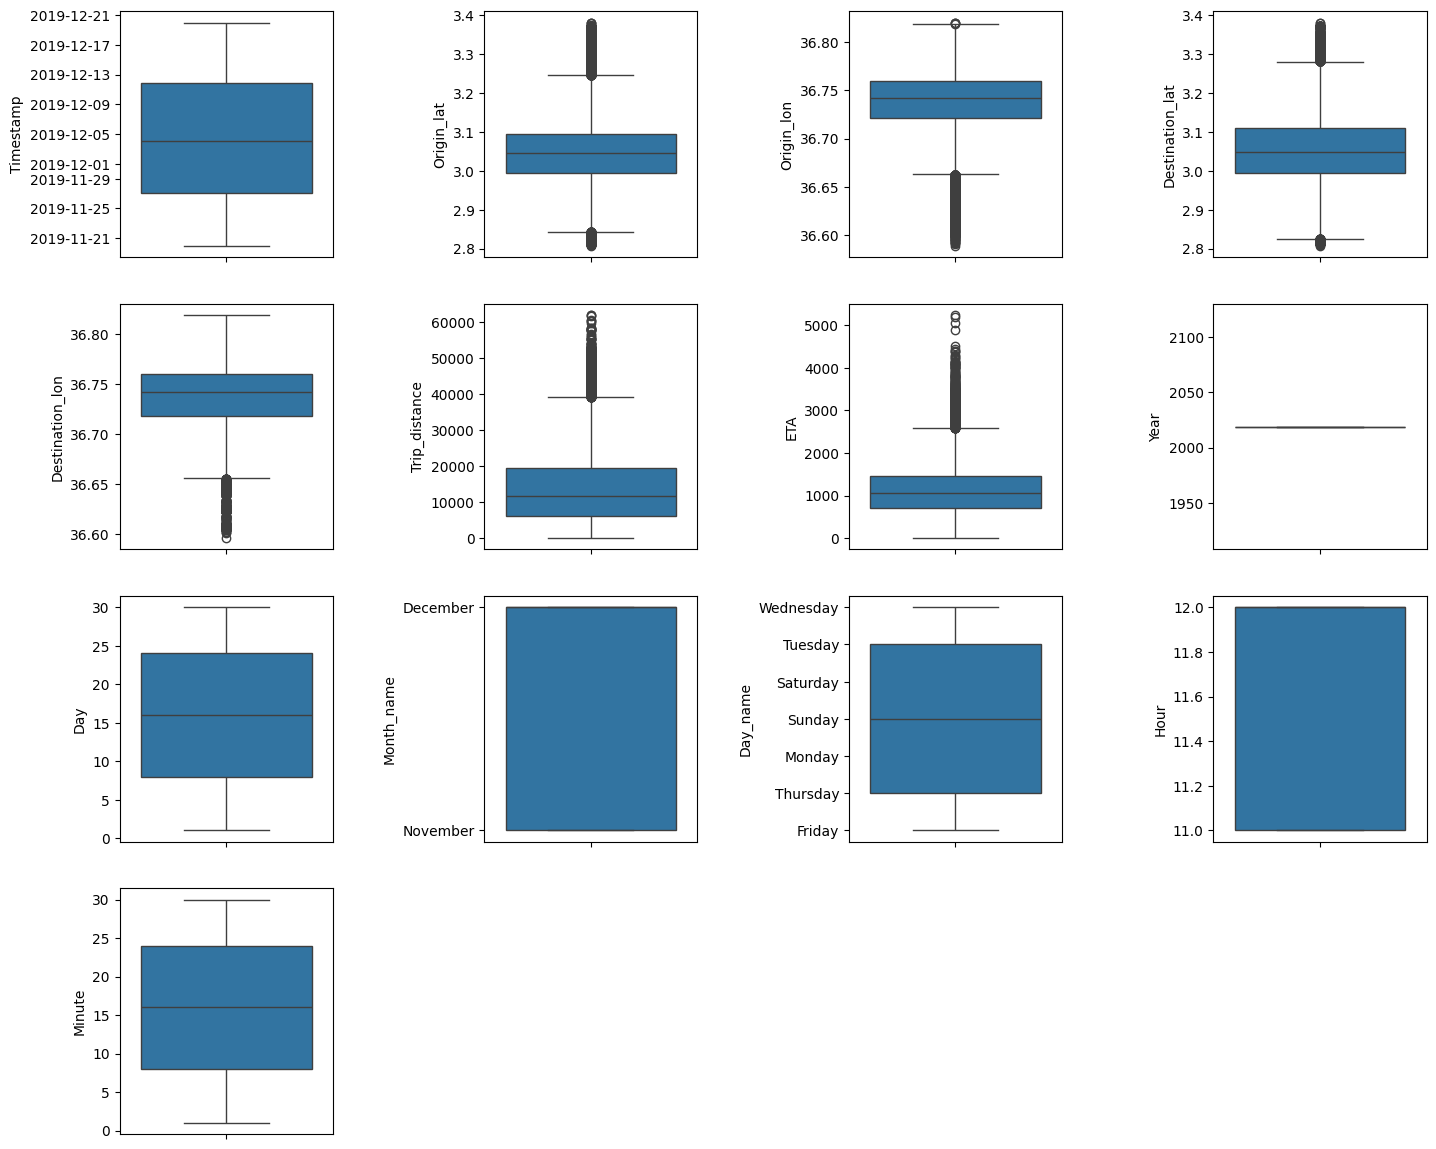

In [178]:


plt.figure(figsize=(15, 15))

for i, variable in enumerate(train_df_noid):
    plt.subplot(5,4, i + 1)
    sns.boxplot(train_df_noid,y=train_df_noid[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

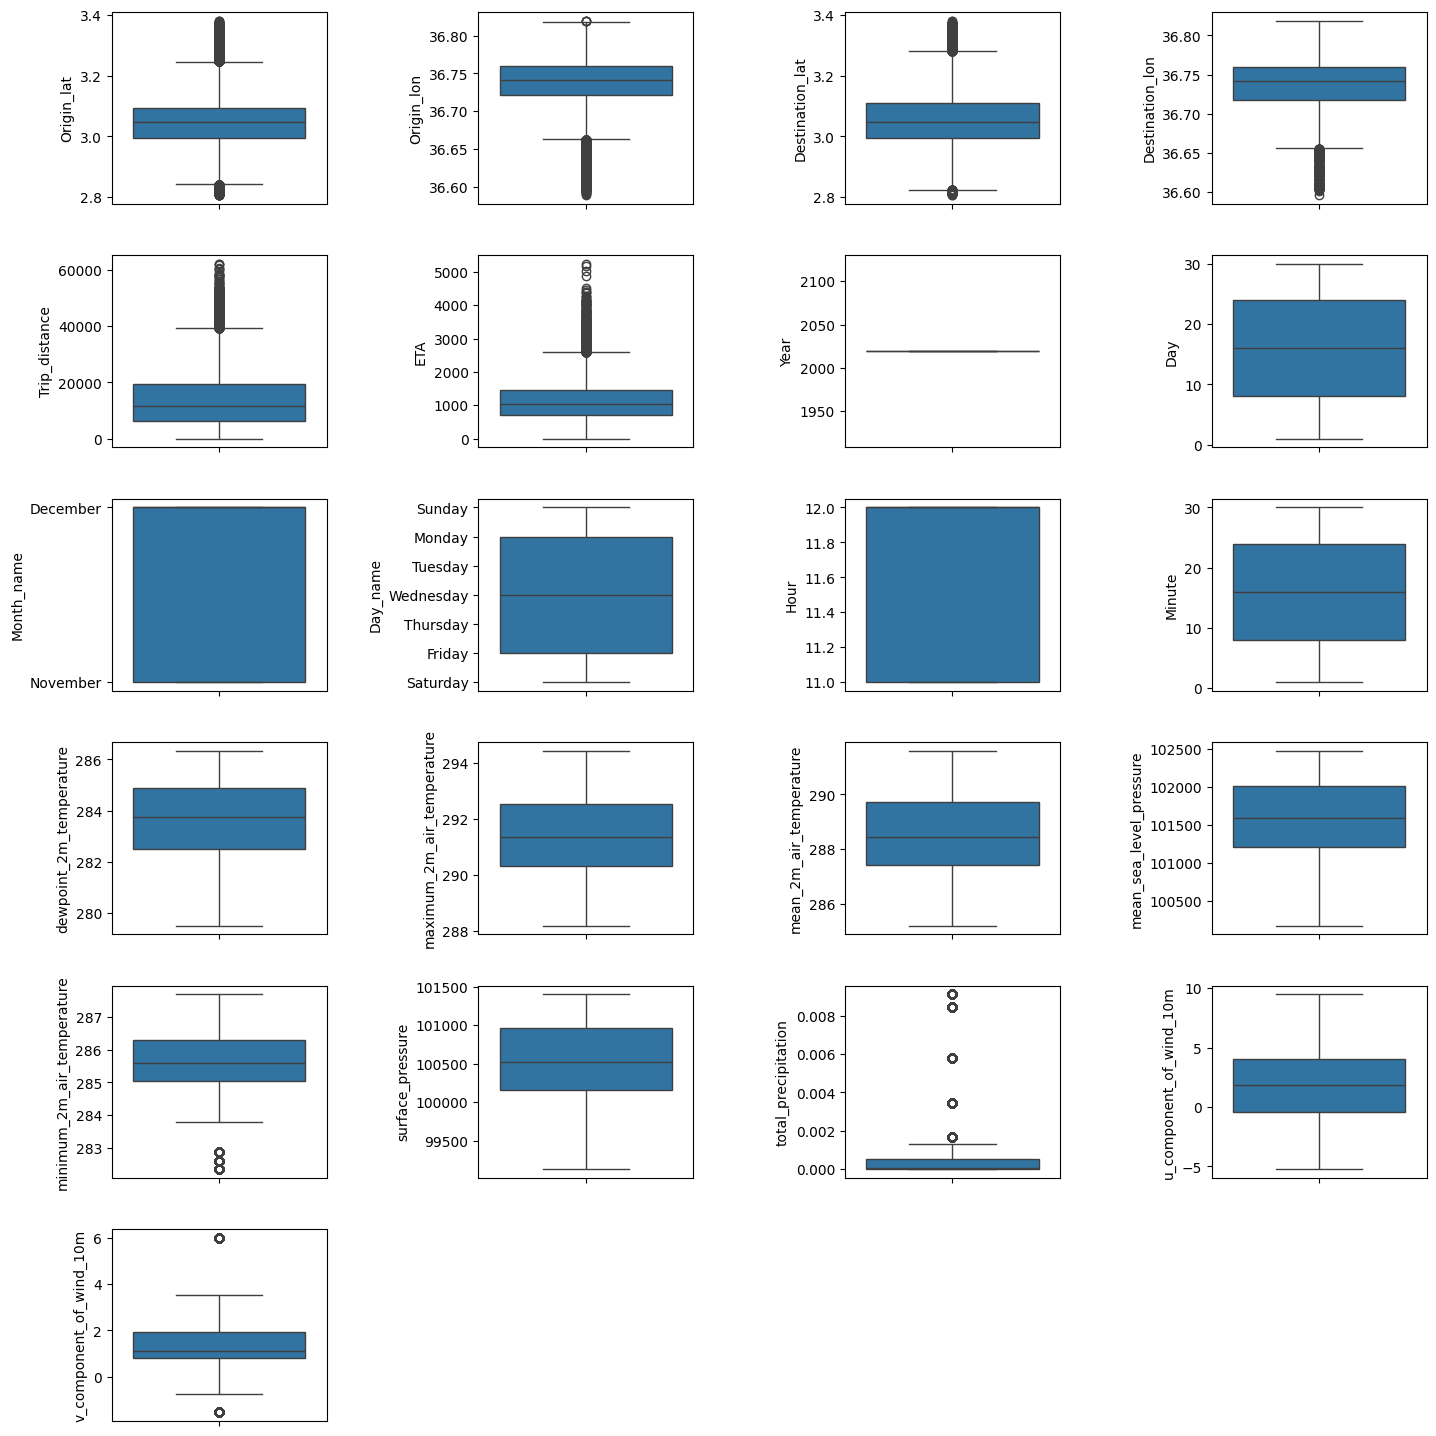

In [179]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(train_weath_df):
    plt.subplot(6,4, i + 1)
    sns.boxplot(train_weath_df,y=train_weath_df[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

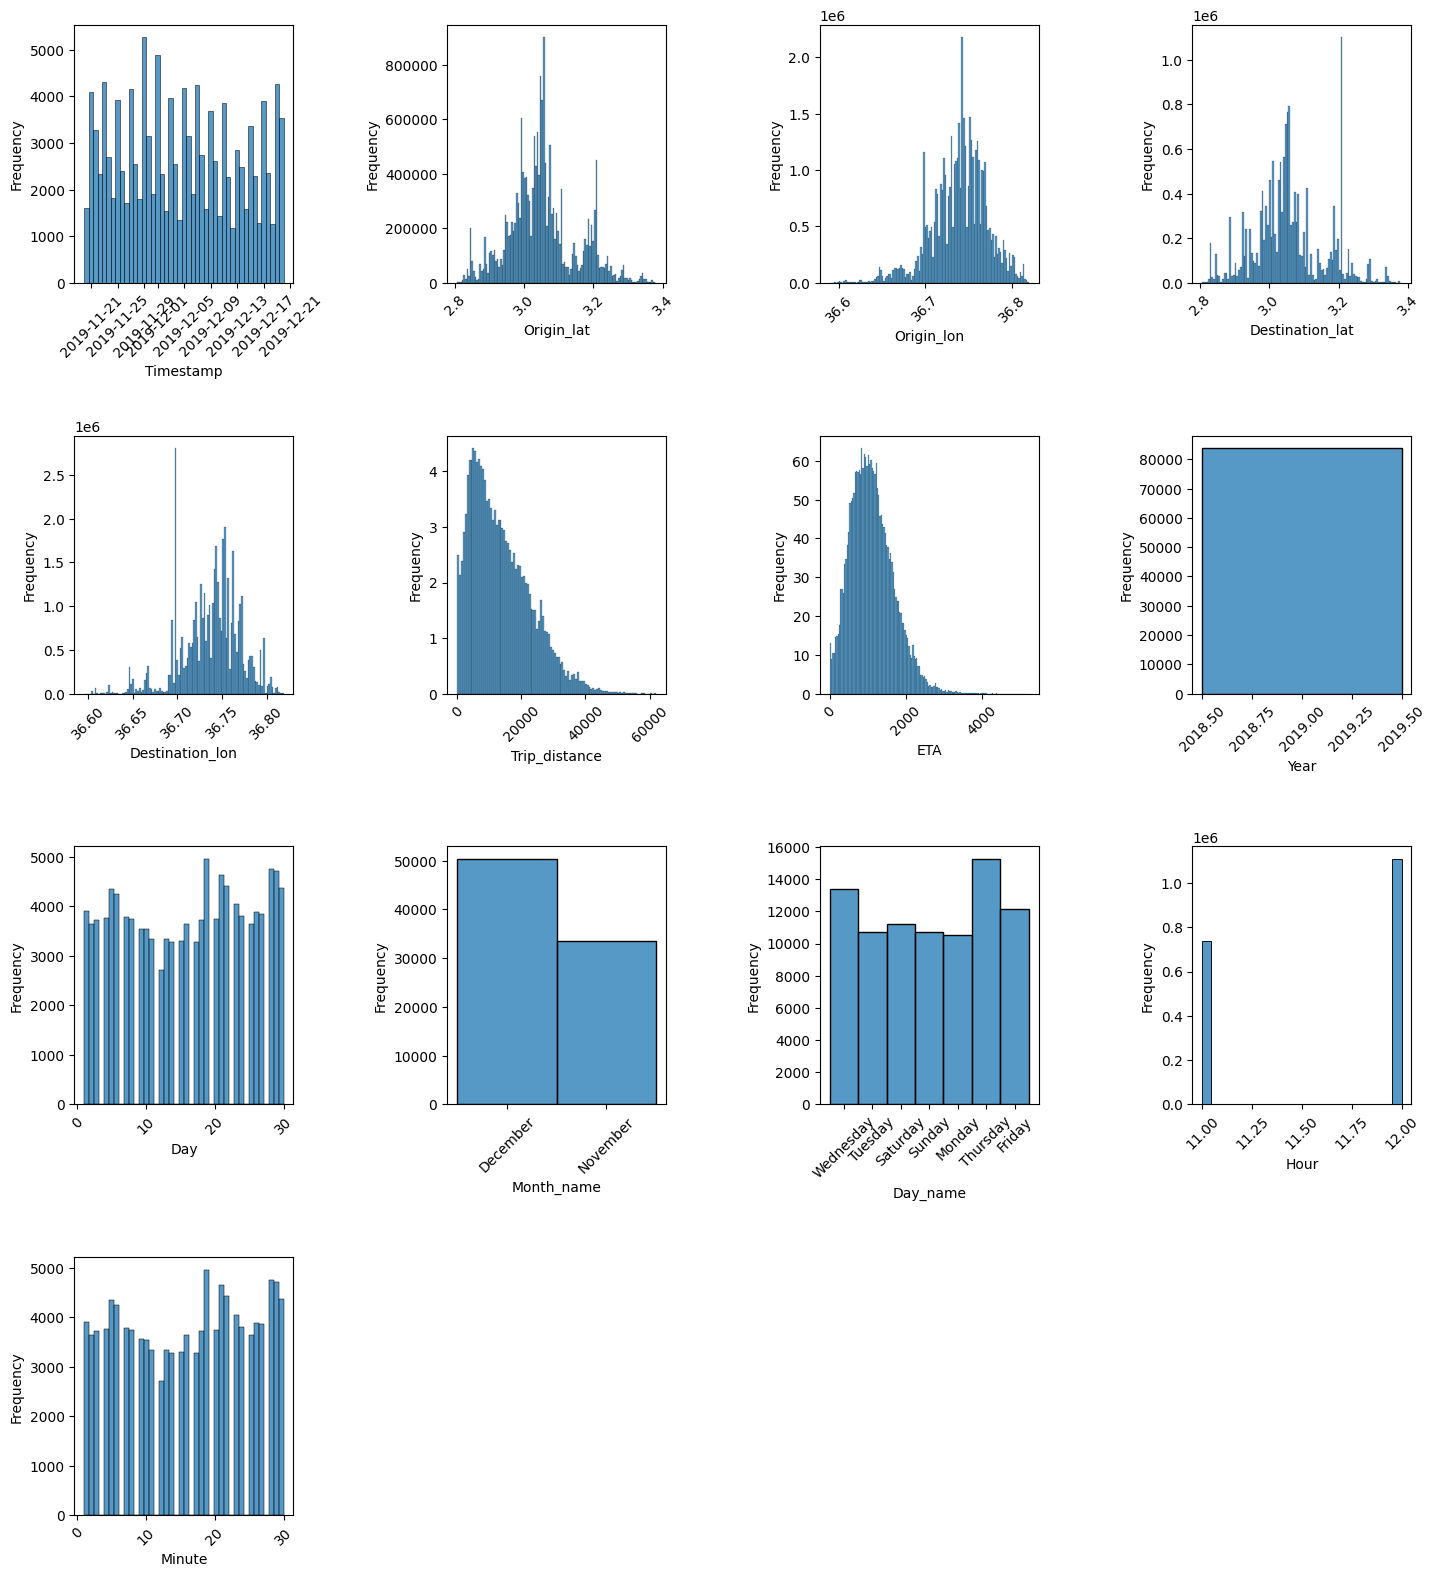

In [180]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(train_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(train_df_noid,x=train_df_noid[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

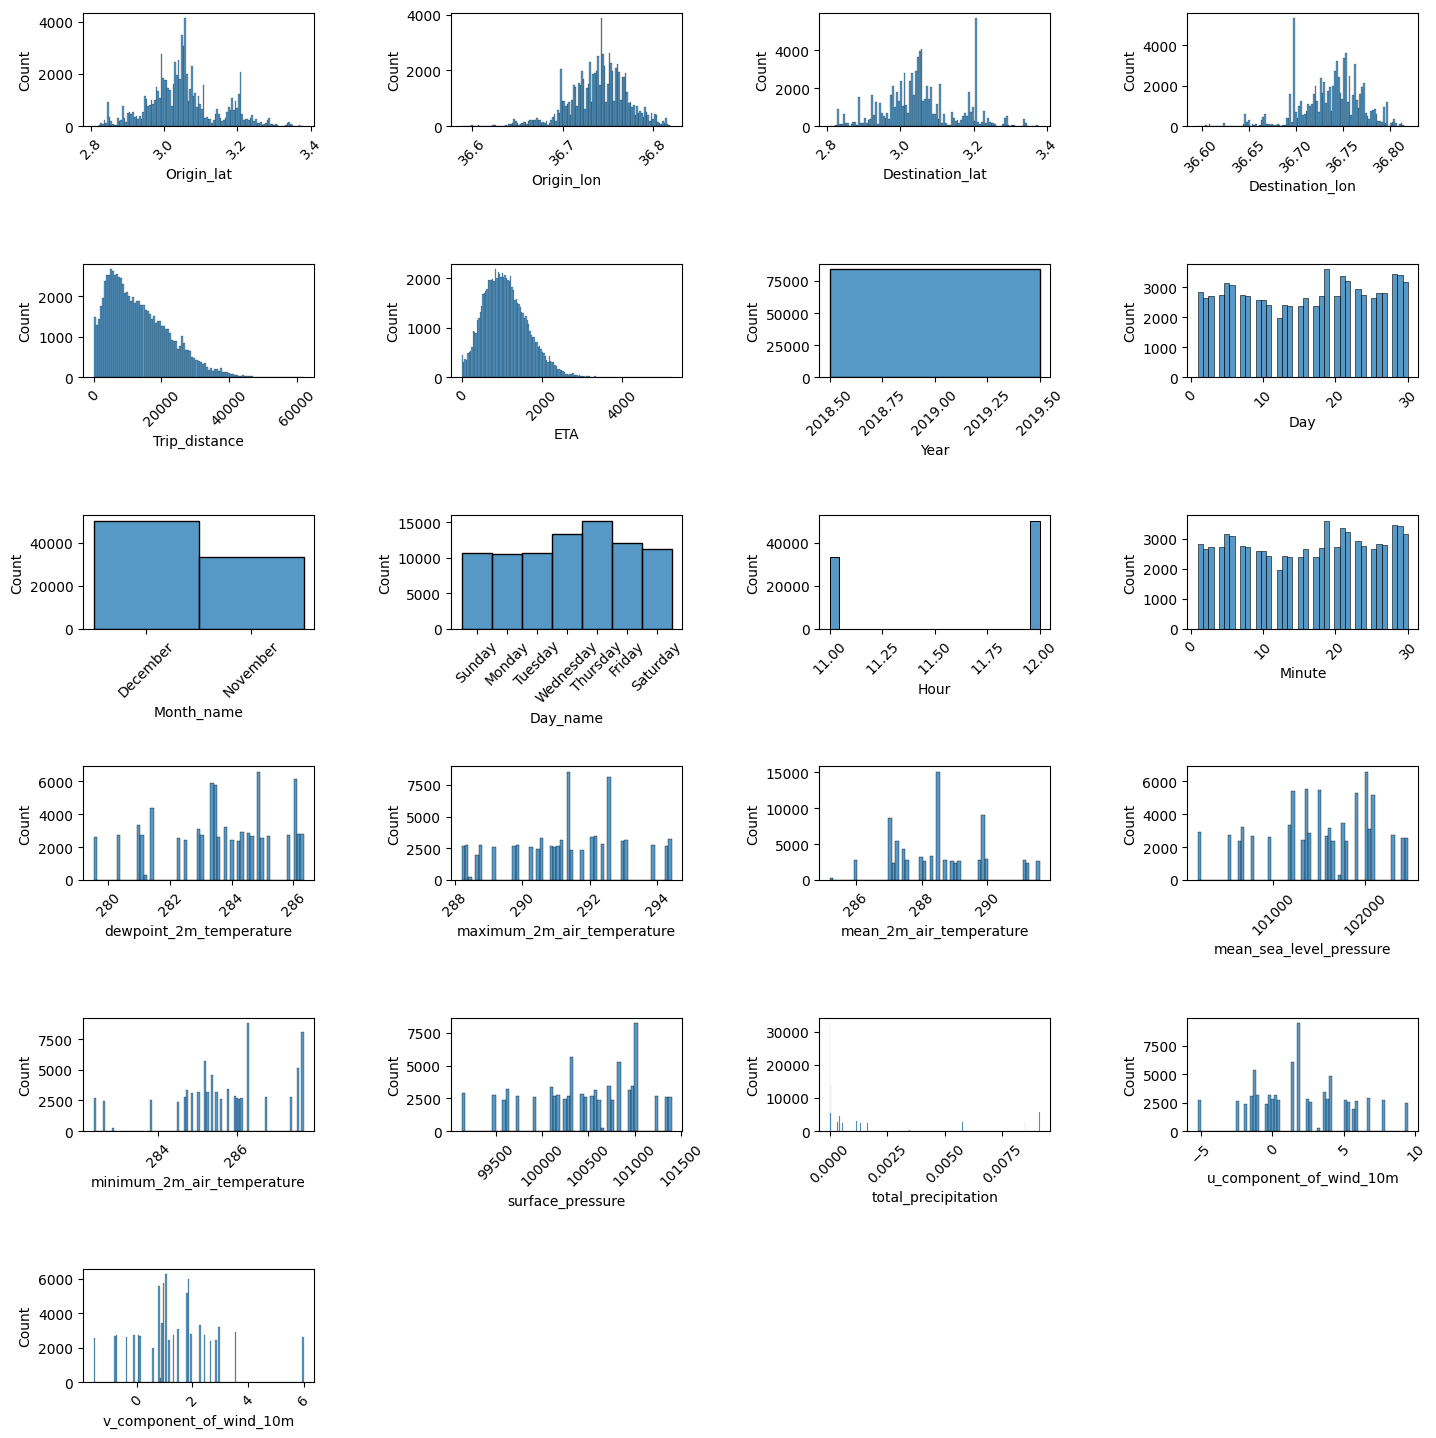

In [181]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(train_weath_df):
    plt.subplot(6,4, i + 1)
    sns.histplot(train_weath_df,x=train_weath_df[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

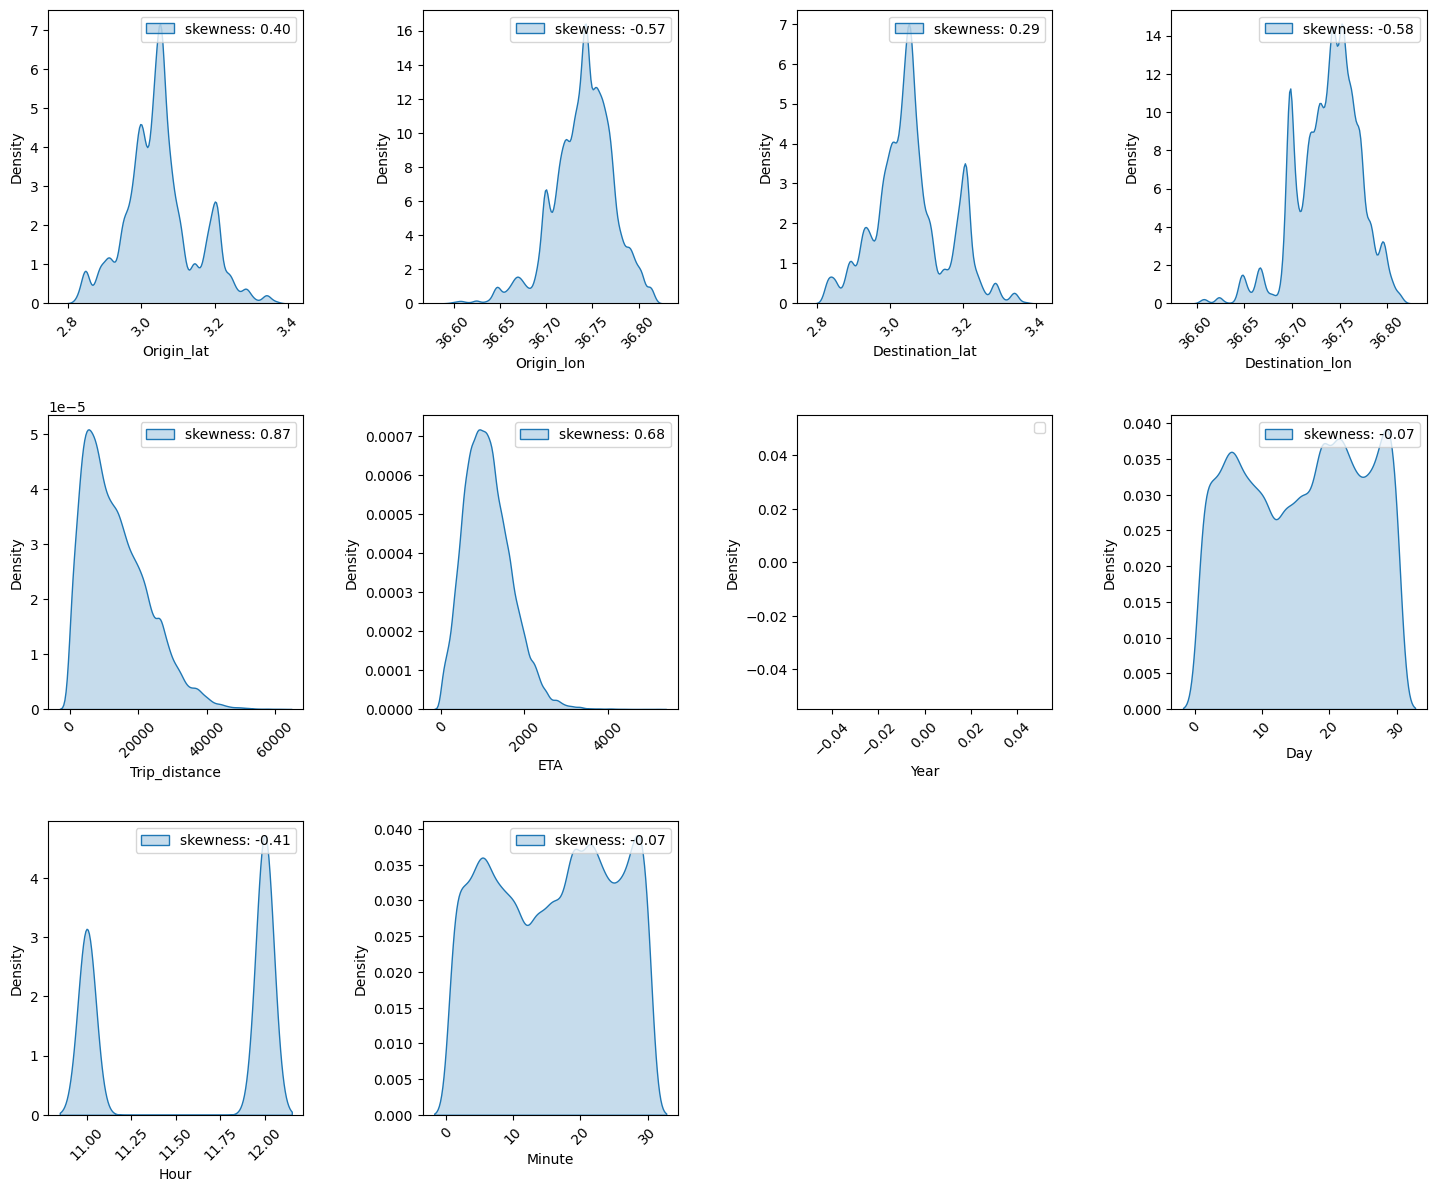

In [182]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(train_df_noid.drop(['Timestamp','Month_name', 'Day_name'], axis=1)):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(train_df_noid,x=train_df_noid[variable],label= 'skewness: %.2f'%(train_df_noid[variable].skew()), fill = True,)
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

#### Bivariate & Multivariate Analysis

<Axes: >

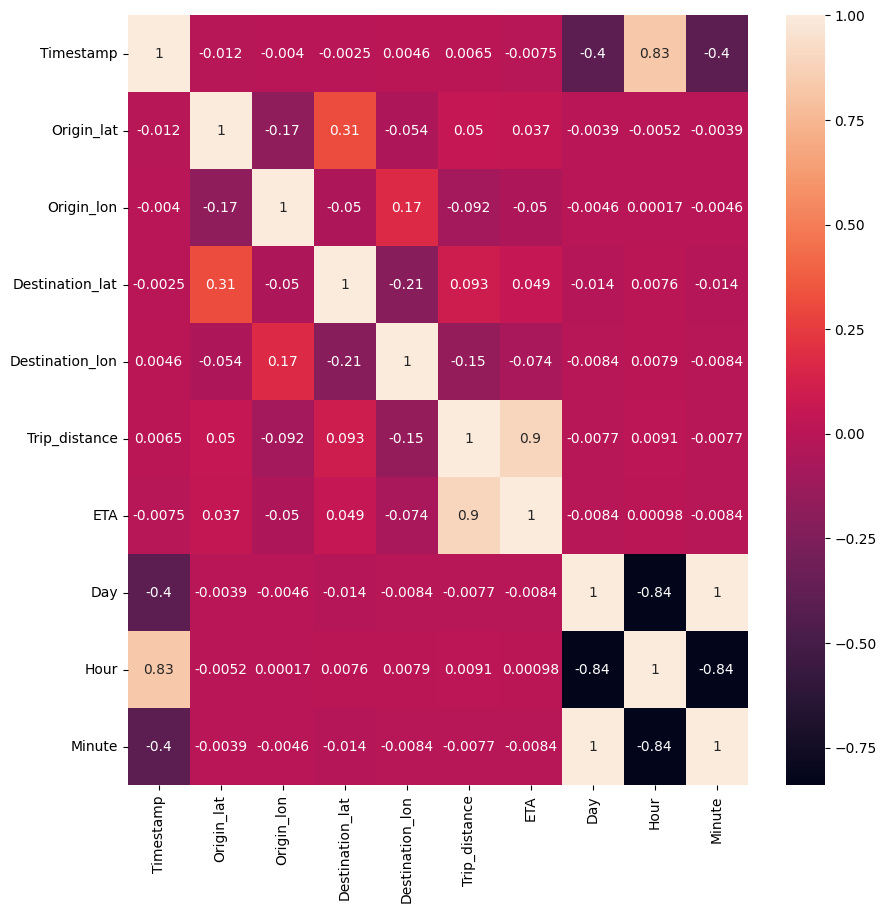

In [184]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=train_df_noid.drop(['Month_name', 'Day_name', 'Year'], axis=1).corr(), annot=True)

### Feature Engineering

#### Train - Validation data split

In [192]:

#X = train_weath_df.drop(columns=['ETA'])
#y = train_weath_df['ETA']

# Splitting the data into training and evaluation sets for both features and labels
#X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=42)

#print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

Initializing models

In [193]:
models={}

models['XGBoost'] = XGBRegressor()
models['GradientBoostRegressor'] = GradientBoostingRegressor()
models['Linear_reg'] = LinearRegression()
models['LogReg'] = LogisticRegression()
models['SVR'] = SVR()
models['KNN'] = KNeighborsRegressor()
models['RForest'] = RandomForestRegressor()
models['Dtree'] = DecisionTreeRegressor()

Creating Pipelines

Modeling with train data without weather data

In [196]:
train_df_noid.isna().sum()

Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
Year               0
Day                0
Month_name         0
Day_name           0
Hour               0
Minute             0
dtype: int64

In [197]:
train_df_noid.duplicated().sum()

np.int64(158)

In [198]:
train_df_noid.drop_duplicates(inplace=True)

In [199]:
train_df_noid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83766 entries, 0 to 83923
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Timestamp        83766 non-null  datetime64[ns, UTC]
 1   Origin_lat       83766 non-null  float64            
 2   Origin_lon       83766 non-null  float64            
 3   Destination_lat  83766 non-null  float64            
 4   Destination_lon  83766 non-null  float64            
 5   Trip_distance    83766 non-null  int64              
 6   ETA              83766 non-null  int64              
 7   Year             83766 non-null  int32              
 8   Day              83766 non-null  int32              
 9   Month_name       83766 non-null  object             
 10  Day_name         83766 non-null  object             
 11  Hour             83766 non-null  int32              
 12  Minute           83766 non-null  int32              
dtypes: datetime64[ns, UTC

In [200]:
train_df_noid.drop(columns=['Day_name', 'Month_name'], inplace=True)

train_df_noid['Month'] = train_df_noid['Timestamp'].dt.month

In [204]:

X1 = train_df_noid.drop(columns=['ETA', 'Timestamp'])
y1 = train_df_noid['ETA']

# Splitting the data into training and evaluation sets for both features and labels
X1_train, X1_eval, y1_train, y1_eval = train_test_split(X1, y1, test_size=0.25, random_state=42)

print(f'X1_train shape: {X1_train.shape}\nX1_eval shape: {X1_eval.shape}\ny1_train shape: {y1_train.shape}\ny1_eval shape: {y1_eval.shape}')

X1_train shape: (62824, 10)
X1_eval shape: (20942, 10)
y1_train shape: (62824,)
y1_eval shape: (20942,)


In [207]:
date_cols = X1_train[['Day', 'Month', 'Year', 'Hour', 'Minute']].columns.tolist()
num_cols = X1_train.drop(columns=date_cols).columns.tolist()

# Define pipelines for date and numerical columns
date_pipeline = Pipeline([
    ('date_imputer', SimpleImputer(strategy='most_frequent'))
])

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine the pipelines into a preprocessor
preprocessor = ColumnTransformer([
    ('date', date_pipeline, date_cols),
    ('num', num_pipeline, num_cols)
])



In [208]:
all_pipelines = {}
metric_table = pd.DataFrame(columns=['model_name', 'MSE', 'MAE', 'RMSE', 'MAPE'])

for model_name, regressor in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        (model_name, TransformedTargetRegressor(regressor=regressor))
    ])
    pipeline.fit(X1_train, y1_train)
    
    all_pipelines[model_name] = pipeline
    
    ETA_pred = pipeline.predict(X1_eval)
    
    MSE = mean_squared_error(y1_eval, ETA_pred)
    MAE = mean_absolute_error(y1_eval, ETA_pred)
    RMSE =np.sqrt(mean_squared_error(y1_eval, ETA_pred)) 
    MAPE = mean_absolute_percentage_error(y1_eval, ETA_pred)
    
    metric_table.loc[len(metric_table)] = [model_name, MSE, MAE, RMSE, MAPE]
    
metric_table.sort_values(by='RMSE')


,model_name,MSE,MAE,RMSE,MAPE
6,RForest,21482.115710,90.537571,146.567785,0.107997
0,XGBoost,23006.607935,102.355986,151.679293,0.151508
1,GradientBoostRegressor,37657.357236,137.170793,194.055037,0.222077
7,Dtree,42840.658360,119.353457,206.979850,0.137698
5,KNN,43773.307575,145.715777,209.220715,0.380015
2,Linear_reg,58768.482270,180.217220,242.422116,0.648851
3,LogReg,316016.376421,437.469248,562.153339,1.722995
4,SVR,316813.907331,441.747232,562.862245,1.824411


Modeling with train data without engineering

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   ID               83924 non-null  object             
 1   Timestamp        83924 non-null  datetime64[ns, UTC]
 2   Origin_lat       83924 non-null  float64            
 3   Origin_lon       83924 non-null  float64            
 4   Destination_lat  83924 non-null  float64            
 5   Destination_lon  83924 non-null  float64            
 6   Trip_distance    83924 non-null  int64              
 7   ETA              83924 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(1)
memory usage: 5.1+ MB


In [ ]:
train_df.drop(columns=['ID'], inplace=True)

In [ ]:
train_df.isna().sum()

Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
dtype: int64

In [ ]:
train_df.duplicated().sum()

np.int64(158)

In [ ]:
train_df.drop_duplicates(inplace=True)

In [ ]:
X2 = train_df.drop(columns=['ETA'])
y2 = train_df['ETA']

# Splitting the data into training and evaluation sets for both features and labels
X2_train, X2_eval, y2_train, y2_eval = train_test_split(X2, y2, test_size=0.25, random_state=42)

print(f'X2_train shape: {X2_train.shape}\nX2_eval shape: {X2_eval.shape}\ny2_train shape: {y2_train.shape}\ny2_eval shape: {y2_eval.shape}')

X2_train shape: (62824, 6)
X2_eval shape: (20942, 6)
y2_train shape: (62824,)
y2_eval shape: (20942,)


In [ ]:
date_cols = X2_train[['Day', 'Month', 'Year', 'Hour', 'Minute']].columns.tolist()
num_cols = X2_train.drop(columns=date_cols).columns.tolist()

# Define pipelines for date and numerical columns
date_pipeline = Pipeline([
    ('date_imputer', SimpleImputer(strategy='most_frequent'))
])

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine the pipelines into a preprocessor
preprocessor = ColumnTransformer([
    ('date', date_pipeline, date_cols),
    ('num', num_pipeline, num_cols)
])


In [ ]:
all_pipelines = {}
metric_table = pd.DataFrame(columns=['model_name', 'MSE', 'MAE', 'RMSE', 'MAPE'])

for model_name, regressor in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        (model_name, TransformedTargetRegressor(regressor=regressor))
    ])
    pipeline.fit(X2_train, y2_train)
    
    all_pipelines[model_name] = pipeline
    
    ETA_pred = pipeline.predict(X2_eval)
    
    MSE = mean_squared_error(y2_eval, ETA_pred)
    MAE = mean_absolute_error(y2_eval, ETA_pred)
    RMSE =np.sqrt(mean_squared_error(y2_eval, ETA_pred)) 
    MAPE = mean_absolute_percentage_error(y2_eval, ETA_pred)
    
    metric_table.loc[len(metric_table)] = [model_name, MSE, MAE, RMSE, MAPE]
    
metric_table.sort_values(by='RMSE')

,model_name,MSE,MAE,RMSE,MAPE
6,RForest,21751.661629,90.882485,147.484445,0.107069
0,XGBoost,23596.543313,103.948248,153.611664,0.156708
5,KNN,26263.561196,104.950396,162.060363,0.169292
1,GradientBoostRegressor,37748.761216,137.359293,194.290404,0.219295
7,Dtree,41609.235149,117.286922,203.983419,0.131953
2,Linear_reg,58883.837991,180.469951,242.659923,0.647657
4,SVR,69076.824086,180.206602,262.824702,0.671068
3,LogReg,78649.467625,203.192197,280.445124,0.234583


Model tuning

In [212]:

date_cols = X1_train[['Day', 'Month', 'Year', 'Hour', 'Minute']].columns.tolist()
num_cols = X1_train.drop(columns=date_cols).columns.tolist()

# Define pipelines for date and numerical columns
date_pipeline = Pipeline([
    ('date_imputer', SimpleImputer(strategy='most_frequent'))
])

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine the pipelines into a preprocessor
preprocessor = ColumnTransformer([
    ('date', date_pipeline, date_cols),
    ('num', num_pipeline, num_cols)
])

# Fit and transform the training data
X1_train_processed = preprocessor.fit_transform(X1_train)

# Convert the transformed data back to a DataFrame for easy inspection (optional)
X1_train_processed_df = pd.DataFrame(X1_train_processed, columns=date_cols + num_cols)

# Define models and their parameter grids
models = {
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }),
    'GradientBoostRegressor': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }),
    """
    'Linear_reg': (LinearRegression(), {}),
    'LogReg': (LogisticRegression(), {
   #     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.1, 1, 10],
   #     'solver': ['lbfgs', 'liblinear']
    }),
    'SVR': (SVR(), {
    #    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
    #    'gamma': ['scale', 'auto']
    }),
    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 10],
    #    'weights': ['uniform', 'distance'],
    #    'metric': ['euclidean', 'manhattan']
    }),
    """
    'RForest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Dtree': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

# Perform Grid Search for each model
for model_name, (model, params) in models.items():
    if params:
        grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
        grid_search.fit(X1_train_processed, y1_train)
        best_params = grid_search.best_params_
        best_score = -grid_search.best_score_
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best MAE score for {model_name}: {best_score}")
    else:
        model.fit(X1_train_processed, y1_train)
        predictions = model.predict(X1_train_processed)
        mae_score = mean_absolute_error(y1_train, predictions)
        print(f"MAE score for {model_name}: {mae_score}")



Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best MAE score for XGBoost: 96.95689666229498
Best parameters for GradientBoostRegressor: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best MAE score for GradientBoostRegressor: 97.97017895852208
Best parameters for 
    'Linear_reg': (LinearRegression(), {}),
    'LogReg': (LogisticRegression(), {
   #     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.1, 1, 10],
   #     'solver': ['lbfgs', 'liblinear']
    }),
    'SVR': (SVR(), {
    #    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
    #    'gamma': ['scale', 'auto']
    }),
    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 10],
    #    'weights': ['uniform', 'distance'],
    #    'metric': ['euclidean', 'manhattan']
    }),
    RForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2,

tuned models

In [213]:
tuned_models={}

tuned_models['XGBoost_tuned'] = XGBRegressor(colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0, random_state=42)
tuned_models['GradientBoostRegressor_tuned'] = GradientBoostingRegressor(learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0, random_state=42)
tuned_models['Linear_reg'] = LinearRegression()
tuned_models['LogReg'] = LogisticRegression()
tuned_models['SVR'] = SVR()
tuned_models['KNN'] = KNeighborsRegressor()
tuned_models['RForest_tuned'] = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
tuned_models['Dtree_tuned'] = DecisionTreeRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10, random_state=42)

In [216]:
all_tpipelines = {}
tmetric_table = pd.DataFrame(columns=['model_name', 'MSE', 'MAE', 'RMSE', 'MAPE'])

for model_name, regressor in tuned_models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        (model_name, TransformedTargetRegressor(regressor=regressor))
    ])
    pipeline.fit(X1_train, y1_train)
    
    all_tpipelines[model_name] = pipeline
    
    ETA_pred = pipeline.predict(X1_eval)
    
    MSE = mean_squared_error(y1_eval, ETA_pred)
    MAE = mean_absolute_error(y1_eval, ETA_pred)
    RMSE =np.sqrt(mean_squared_error(y1_eval, ETA_pred)) 
    MAPE = mean_absolute_percentage_error(y1_eval, ETA_pred)
    
    tmetric_table.loc[len(tmetric_table)] = [model_name, MSE, MAE, RMSE, MAPE]
    
tmetric_table.sort_values(by='RMSE')

,model_name,MSE,MAE,RMSE,MAPE
0,XGBoost_tuned,19904.496744,91.839688,141.083297,0.139358
1,GradientBoostRegressor_tuned,20783.807150,94.726717,144.165901,0.138759
6,RForest_tuned,21404.589142,90.219158,146.303073,0.108138
7,Dtree_tuned,34390.463802,120.612946,185.446660,0.141152
5,KNN,43773.307575,145.715777,209.220715,0.380015
2,Linear_reg,58768.482270,180.217220,242.422116,0.648851
3,LogReg,316016.376421,437.469248,562.153339,1.722995
4,SVR,316813.907331,441.747232,562.862245,1.824411
